# First

In [1]:
import importlib
importlib.import_module('mpl_toolkits.mplot3d').Axes3D

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np

mpl_toolkits.mplot3d.axes3d.Axes3D

(-1.01, 1.01)

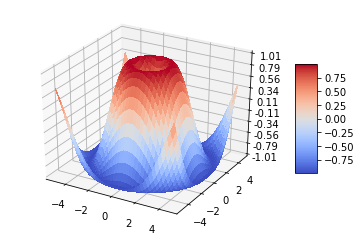

In [2]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data
X = np.arange(-5, 5, 0.25)
Y = np.arange(-5, 5, 0.25)
X, Y = np.meshgrid(X, Y)
R = np.sqrt(X**2+Y**2)
Z = np.sin(R)

surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis
ax.set_zlim(-1.01, 1.01)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

# Second

Text(0.5,0,'x-axis')

Text(0,0.5,'y-axis')

Text(0.5,1,'darrrrn good')

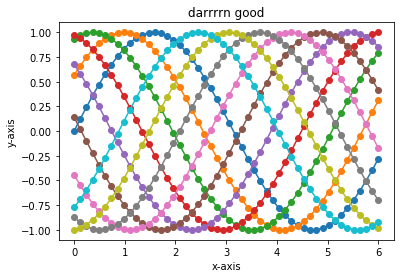

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# plt.style.use('dark_background')

fig, ax = plt.subplots()

L = 6
x = np.linspace(0, L)
ncolors = len(plt.rcParams['axes.prop_cycle'])
shift = np.linspace(0, L, ncolors, endpoint=False)

for s in shift:
    ax.plot(x, np.sin(x+s), 'o-')
ax.set_xlabel('x-axis')
ax.set_ylabel('y-axis')
ax.set_title('darrrrn good')

plt.show()

# Third

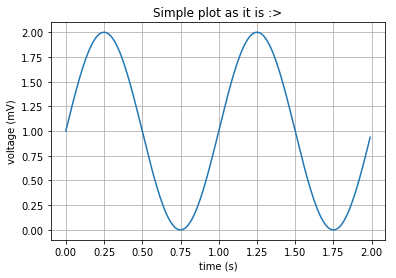

In [4]:
import matplotlib 
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting 
t = np.arange(0.0,2.0,0.01)
s = 1+np.sin(2*np.pi*t)

fig,ax = plt.subplots()
ax.plot(t,s)

ax.set(xlabel='time (s)',ylabel='voltage (mV)',
      title='Simple plot as it is :>')
ax.grid()

plt.show()

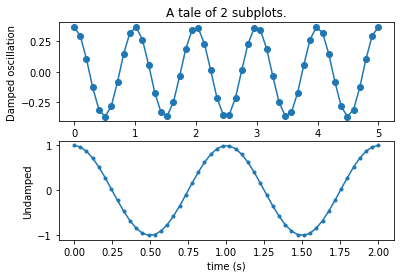

In [5]:
import numpy as np
import matplotlib.pyplot as plt

x1 = np.linspace(0.0,5.0)
x2 = np.linspace(0.0,2.0)

y1 = np.cos(2*np.pi*x1) * np.exp(-1)
y2 = np.cos(2*np.pi*x2)

plt.subplot(2,1,1)
plt.plot(x1,y1,'o-')
plt.title('A tale of 2 subplots.')
plt.ylabel('Damped oscillation')

plt.subplot(2,1,2)
plt.plot(x2,y2,'.-')
plt.xlabel('time (s)')
plt.ylabel('Undamped')

plt.show()

# Fourth

In [6]:
from __future__ import print_function

import numpy as np
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook
from matplotlib.path import Path
from matplotlib.patches import PathPatch

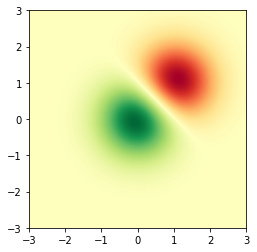

In [7]:
delta = 0.025 
x = y  = np.arange(-3.0,3.0,delta)

X,Y = np.meshgrid(x,y)
Z1 = np.exp(-X**2 - Y**2)
Z2 = np.exp(-(X-1)**2-(Y-1)**2)
Z = (Z1-Z2)*2

im = plt.imshow(Z,interpolation='bilinear',cmap=cm.RdYlGn,
               origin='lower',extent=[-3,3,-3,3],
               vmax=abs(Z).max(),vmin=-abs(Z).max())

plt.show()

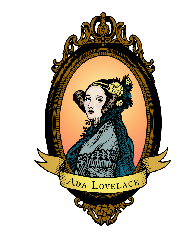

In [8]:
# A sample image  ( no-need-to-download )
with cbook.get_sample_data('ada.png') as image_file:
    image = plt.imread(image_file)

fig, ax = plt.subplots()
ax.imshow(image)
ax.axis('off')

plt.show()

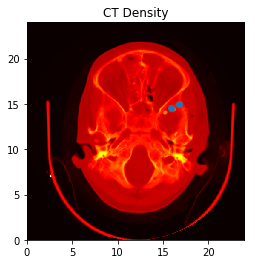

In [9]:
# Add another image

w, h = 512, 512
with cbook.get_sample_data('ct.raw.gz', asfileobj=True) as datafile:
    s = datafile.read()
A = np.frombuffer(s, np.uint16).astype('float').reshape(w,h)
A /= A.max()

fig,ax = plt.subplots()
extent = (0,24,0,24)
im = ax.imshow(A,cmap=plt.cm.hot,origin='upper',extent=extent)

markers = [(15.9,14.6),(16.8,15)]
x,y = zip(*markers)
ax.plot(x,y,'o')

ax.set_title('CT Density')


plt.show()

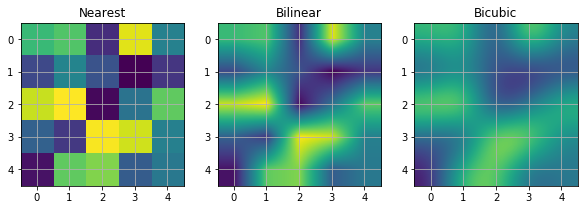

In [10]:
A = np.random.rand(5, 5)


fig, axs = plt.subplots(1, 3, figsize=(10, 3))
for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
    ax.imshow(A, interpolation=interp)
    ax.set_title(interp.capitalize())
    ax.grid(True)

plt.show()

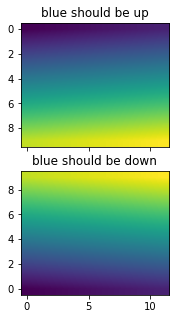

In [11]:
x = np.arange(120).reshape((10,12))

interp = 'bilinear'
fig,axs = plt.subplots(nrows=2,sharex=True,figsize=(3,5))
axs[0].set_title('blue should be up')
axs[0].imshow(x,origin='upper',interpolation=interp)

axs[1].set_title('blue should be down')
axs[1].imshow(x,origin='lower',interpolation=interp)
plt.show()

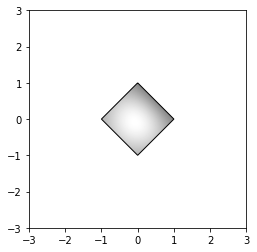

In [12]:
delta = 0.025
x = y = np.arange(-3.0, 3.0, delta)

X, Y = np.meshgrid(x, y)
Z1 = np.exp(-X**2-Y**2)
Z2 = np.exp(-(X-1)**2-(Y-1)**2)
Z = (Z1-Z2)*2

path = Path([[0, 1], [1, 0], [0, -1], [-1, 0], [0, 1]])
patch = PathPatch(path, facecolor='none')

fig, ax = plt.subplots()
ax.add_patch(patch)

im = ax.imshow(Z, interpolation='bilinear', cmap=cm.gray,
               origin='lower', extent=[-3, 3, -3, 3],
               clip_path=patch, clip_on=True)
im.set_clip_path(patch)

plt.show()

# Fifth

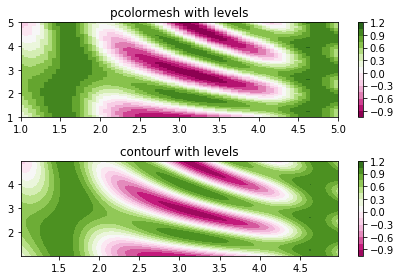

In [13]:
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import BoundaryNorm
from matplotlib.ticker import MaxNLocator
import numpy as np

# make these smaller to inscrease the resolution
dx, dy = 0.05, 0.05

y, x = np.mgrid[slice(1, 5+dx, dy),
                slice(1, 5+dx, dx)]

z = np.sin(x)**10 + np.cos(10+y*x) * np.cos(x)

# x and y are bounds, so z should be the value *inside* those bounds
# Therefore, remove the last value from the z array.
z = z[:-1, :-1]
levels = MaxNLocator(nbins=15).tick_values(z.min(), z.max())

# pick the desired colormap, sensible levels, and define a normalization
# instance which takes data values and translates those into levels
cmap = plt.get_cmap('PiYG')
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

fig, (ax0, ax1) = plt.subplots(nrows=2)

im = ax0.pcolormesh(x, y, z, cmap=cmap, norm=norm)
fig.colorbar(im, ax=ax0)
ax0.set_title('pcolormesh with levels')

# counters are *point* based plots,
# so convert our bound into point centers
cf = ax1.contourf(x[:-1, :-1]+dx/2.0,
                  y[:-1, :-1]+dy/2.0, 
                  z, levels=levels, cmap=cmap)
fig.colorbar(cf,ax=ax1)
ax1.set_title('contourf with levels')

# adjust spacing between subplots 
# so `ax1` title and `ax0` tick labels don't overlap
fig.tight_layout()

plt.show()

# Sixth

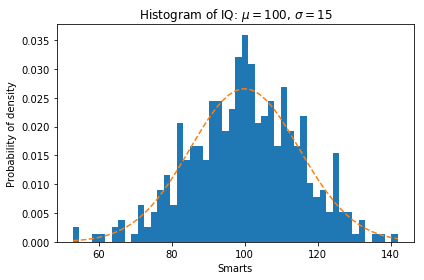

In [14]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(19680801)

# example data
mu = 100    # mean of distribution
sigma = 15  # standard deviation of distribution
x = mu + sigma * np.random.randn(437)

num_bins = 50

fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(x, num_bins, density=1)

# add a 'best fit' line
y = (
    (1/(np.sqrt(2*np.pi)*sigma)) *
    np.exp(
        (-0.5 *
         (1/sigma*(bins-mu))**2)
    )
)
ax.plot(bins, y, '--')
ax.set_xlabel('Smarts')
ax.set_ylabel('Probability of density')
ax.set_title(r'Histogram of IQ: $\mu=100$, $\sigma=15$')

# Tweak spacing to prevent clipping of ylabel
fig.tight_layout()
plt.show()

# Seventh

Text(0,-0.4,'I Love Python.')

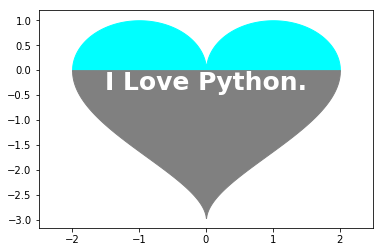

In [15]:
%matplotlib inline

import pylab
import scipy

x = scipy.linspace(-2, 2, 1500)
y1 = scipy.sqrt(1-(abs(x)-1)**2)
y2 = -3*scipy.sqrt(1-(abs(x)/2)**0.5)

pylab.fill_between(x, y1, color='aqua')
pylab.fill_between(x, y2, color='gray')

pylab.xlim([-2.5, 2.5])
pylab.text(0, -0.4, 'I Love Python.',
           fontsize=25, fontweight='bold',
           color='white', horizontalalignment='center')

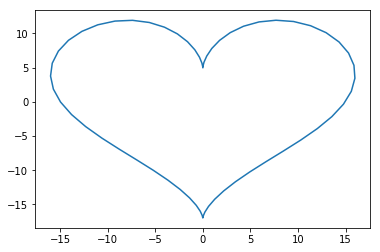

In [16]:
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(0, 2*np.pi, 0.1)
x = 16*np.sin(t)**3
y = 13*np.cos(t)-5*np.cos(2*t)-2*np.cos(3*t)-np.cos(4*t)

plt.plot(x,y)
plt.show()

# Eighth

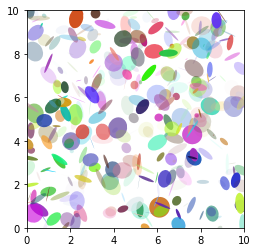

In [17]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.patches import Ellipse

NUM = 350

ells = [
    Ellipse(
        xy=np.random.rand(2)*10,
        width=np.random.rand(),
        height=np.random.rand(),
        angle=np.random.rand()*360
    )
    for i in range(NUM)
]

fig,ax = plt.subplots(subplot_kw={'aspect':'equal'})

for e in ells:
    ax.add_artist(e)
    e.set_clip_box(ax.bbox)
    e.set_alpha(np.random.rand())
    e.set_facecolor(np.random.rand(3))
    
ax.set_xlim(0,10)
ax.set_ylim(0,10)

plt.show()

# Ninth

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

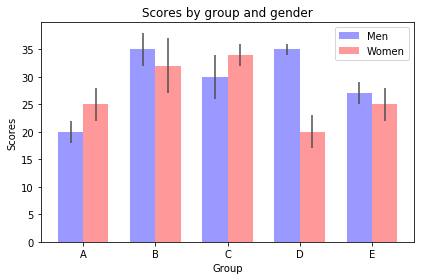

In [19]:
n_groups = 5

means_men = (20, 35, 30, 35, 27)
std_men = (2, 3, 4, 1, 2)

means_women = (25, 32, 34, 20, 25)
std_women = (3, 5, 2, 3, 3)

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.4
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, means_men, bar_width,
                alpha=opacity, color='b',
                yerr=std_men, error_kw=error_config,
                label='Men')

rects2 = ax.bar(index+bar_width, means_women, bar_width,
                alpha=opacity, color='r',
                yerr=std_women, error_kw=error_config,
                label='Women')

ax.set_xlabel('Group')
ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.set_xticks(index+bar_width/2)
ax.set_xticklabels(('A','B','C','D','E'))

ax.legend()

fig.tight_layout()
plt.show()

# Tenth

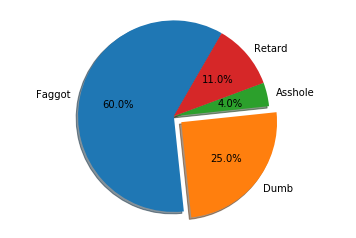

In [2]:
import matplotlib.pyplot as plt

labels = 'Faggot', 'Dumb', 'Asshole', 'Retard'
sizes = [60, 25, 4, 11]
explode = (0, 0.1, 0, 0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=60)
ax1.axis('equal')

plt.show()

# Eleventh

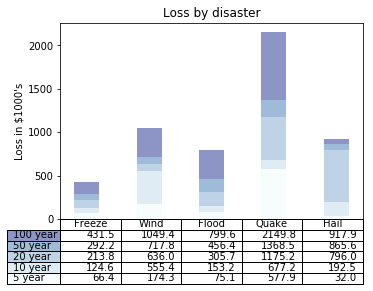

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = [[66386, 174296,  75131, 577908,  32015],
        [58230, 381139,  78045,  99308, 160454],
        [89135,  80552, 152558, 497981, 603535],
        [78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x/1000.0) for x in y_offset])

# Reverse colors and text labels to display the last value at the top
colors = colors[::-1]
cell_text.reverse()

# Add a table at the bottom of the axes
the_table = plt.table(
    cellText=cell_text,
    rowLabels=rows,
    rowColours=colors,
    colLabels=columns,
    loc='bottom'
)

# Adjust the layout to make room for the table
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])

plt.title('Loss by disaster')
plt.show()

# Twelfth

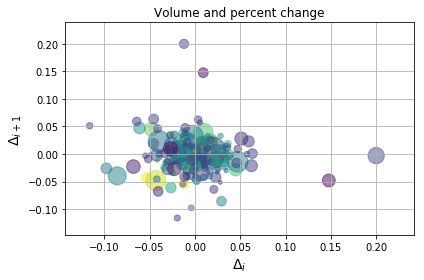

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cbook as cbook

# Load a numpy record arry from yahoo csv data
#     with fields date, open, close, volume, adj_close
#     from the mpl-data/example directory
# The record array stores the date
#     as an np.datetime64 with a day unit('D) in the date column
with cbook.get_sample_data('goog.npz') as datafile:
    price_data = np.load(datafile)['price_data'].view(np.recarray)
price_data = price_data[-250:]

delta1 = np.diff(price_data.adj_close) / price_data.adj_close[:-1]

# Marker size in units of points^2
volume = (15*price_data.volume[:-2] / price_data.volume[0]) ** 2
close = 0.003 * price_data.close[:-2] / 0.003 * price_data.open[:-2]

fig, ax = plt.subplots()
ax.scatter(delta1[:-1], delta1[1:], c=close, s=volume, alpha=0.5)

ax.set_xlabel(r'$\Delta_i$', fontsize=14)
ax.set_ylabel(r'$\Delta_{i+1}$', fontsize=14)
ax.set_title('Volume and percent change')

ax.grid(True)
fig.tight_layout()

plt.show()

# Thirteen

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

[0, 1, -10, 10]

0

0

0

0

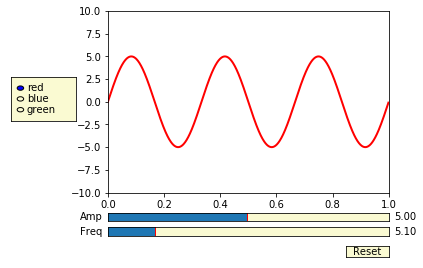

In [5]:
fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)

t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0

s = a0*np.sin(2*np.pi*f0*t)
l, = plt.plot(t,s,lw=2,color='red')
plt.axis([0,1,-10,10])

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25,0.1,0.65,0.03],facecolor=axcolor)
axamp = plt.axes([0.25,0.15,0.65,0.03],facecolor=axcolor)

sfreq = Slider(axfreq,'Freq',0.1,30.0,valinit=f0,valstep=delta_f)
samp = Slider(axamp,'Amp',0.1,10.0,valinit=a0)

def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()

sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8,0.025,0.1,0.04])
button = Button(resetax,'Reset',color=axcolor,hovercolor='0.975')

def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025,0.5,0.15,0.15],facecolor=axcolor)
radio = RadioButtons(rax,('red','blue','green'),active=0)

def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

# Fourteen

In [2]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,500)
y = np.sin(4*np.pi*x) * np.exp(-5*x)

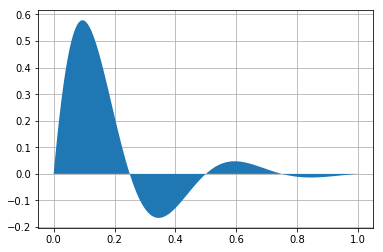

In [3]:
fig,ax = plt.subplots()
ax.fill(x,y,zorder=10)
ax.grid(True,zorder=5)

x = np.linspace(0,2*np.pi,500)
y1 = np.sin(x)
y2 = np.sin(4*x)

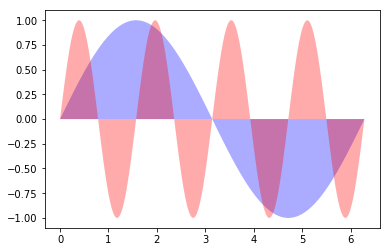

In [4]:
fig,ax = plt.subplots()
ax.fill(x,y1,'b',x,y2,'r',alpha=0.33)

plt.show()

# Fifteen

In [17]:
import datetime 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

years = mdates.YearLocator()
months = mdates.MonthLocator()
yearsFmt = mdates.DateFormatter('%Y')

注意: 下边要用的示例数据*可能不存在*, 须至 Github 下载<br>
- [数据文件地址 <small>(github)</small>](https://github.com/matplotlib/matplotlib/tree/master/lib/matplotlib/mpl-data/sample_data)
- 本地路径 <small>(anaconda)</small>
> /Volumes/exFAT_Two/Anaconda
>> /anaconda3/envs/pythonista/lib/python3.5/site-packages/matplotlib
>>> /mpl-data/**sample_data** <small>(若无最后一级目录, 手动创建即可)</small>

In [21]:
# Load a numpy record array from yahoo csv data
with cbook.get_sample_data('goog.npz') as datafile:
    r = np.load(datafile)['price_data'].view(np.recarray)

(731581.0, 733408.0)

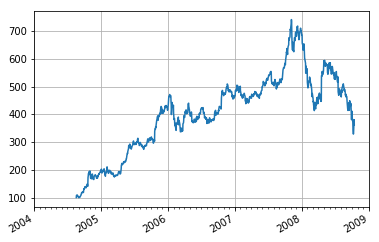

In [22]:
fig,ax = plt.subplots()
ax.plot(r.date,r.adj_close)

# format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

# round to nearest years
datemin = np.datetime64(r.date[0],'Y')
datemax = np.datetime64(r.date[-1],'Y') + np.timedelta64(1,'Y')
ax.set_xlim(datemin,datemax)

def price(x):
    return '$%1.2f' % x
ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
ax.format_ydata = price
ax.grid(True)

# rotates and right aligns the x labels, 
#   and moves the bottom of the axes up to make room for them
fig.autofmt_xdate()

plt.show()

# Sixteen

[Text(0.5,1,'semilogy')]

[Text(0.5,1,'semilogx')]

[Text(0.5,1,'loglog base 2 on x')]

[Text(0.5,1,'Errorbars go negative')]

<ErrorbarContainer object of 3 artists>

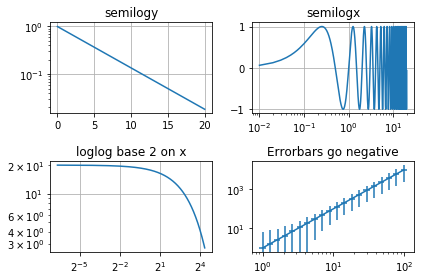

In [32]:
import numpy as np
import matplotlib.pyplot as plt


# Hmm.
t = np.arange(0.01,20.0,0.01)
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2)

# log y axis
ax1.semilogy(t,np.exp(-t/5.0))
ax1.set(title='semilogy')
ax1.grid()

# log x axis
ax2.semilogx(t,np.sin(2*np.pi*t))
ax2.set(title='semilogx')
ax2.grid()

# log x and y axis
ax3.loglog(t,20*np.exp(-t/10.0),basex=2)
ax3.set(title='loglog base 2 on x')
ax3.grid()

# With errorbars: clip non-positive values
# Use new data for plotting
x = 10.0 ** np.linspace(0.0,2.0,20)
y = x**2.0

ax4.set_xscale("log",nonposx='clip')
ax4.set_yscale("log",nonposy='clip')
ax4.set(title='Errorbars go negative')
ax4.errorbar(x,y,xerr=0.1*x,yerr=5.0+0.75*y)

fig.tight_layout()
plt.show()

# Seventeen

Text(0.5,1.05,'A line plot on a polar axis')

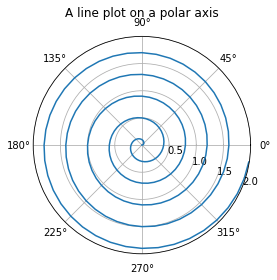

In [49]:
import numpy as np
import matplotlib.pyplot as plt


r = np.arange(0,2,0.01)
theta = 5 * np.pi * r

ax = plt.subplot(111,projection='polar')
ax.plot(theta,r)
ax.set_rmax(2)
ax.set_rticks([0.5,1,1.5,2])
ax.set_rlabel_position(-22.5)
ax.grid(True)

ax.set_title("A line plot on a polar axis",va='bottom')
plt.show()

# Eighteen

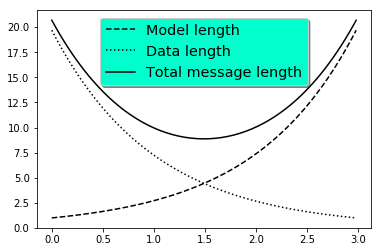

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Make some fake data
a = b = np.arange(0,3,0.02)
c = np.exp(a)
d = c[::-1]

# Create plots with pre-defined labels.
fig,ax = plt.subplots()
ax.plot(a,c,'k--',label='Model length')
ax.plot(a,d,'k:',label='Data length')
ax.plot(a,c+d,'k',label='Total message length')

legend = ax.legend(loc='upper center',shadow=True,fontsize='x-large')

# Put a nicer background color on the legend
legend.get_frame().set_facecolor('#00FFCC')

plt.show()

# Nineteen

In [64]:
%matplotlib inline

This <small>(latex)</small> could be used in *markdown text* !

r'$\alpha_i > \beta_i$'

# Twenty

In [3]:
import matplotlib.pyplot as plt
import numpy as np

([], <a list of 0 Text xticklabel objects>)

([], <a list of 0 Text yticklabel objects>)

(-30, 10)

Text(15,-10,'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED')

Text(0.5,0,'time')

Text(0,0.5,'my overall health')

Text(0.5,0.05,'"Stove Ownership" from xkcd by Randall Monroe')

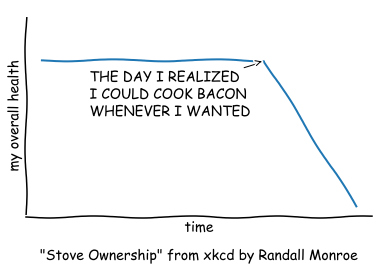

In [6]:
# source
#   http://xkcd.com/418

with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0.1,0.2,0.8,0.7))
    ax.spines['right'].set_color('none')
    ax.spines['top'].set_color('none')
    
    plt.xticks([])
    plt.yticks([])
    ax.set_ylim([-30,10])
    
    data = np.ones(100)
    data[70:] -= np.arange(30)
    
    plt.annotate(
        'THE DAY I REALIZED\nI COULD COOK BACON\nWHENEVER I WANTED',
        xy=(70,1),arrowprops=dict(arrowstyle='->'),xytext=(15,-10)
    )
    
    plt.plot(data)
    
    plt.xlabel('time')
    plt.ylabel('my overall health')
    fig.text(
        0.5,0.05,'"Stove Ownership" from xkcd by Randall Monroe',
        ha='center'
    )

<BarContainer object of 2 artists>

(-0.5, 1.5)

(0, 110)

[Text(0,0,'CONFIRMED BY\nEXPERIMENT'), Text(0,0,'REFUTED BY\nEXPERIMENT')]

([], <a list of 0 Text yticklabel objects>)

Text(0.5,1,'CLAIMS OF SUPERNATURAL POWERS')

Text(0.5,0.001,'"The Data So Far" from xkcd by Randall Monroe')

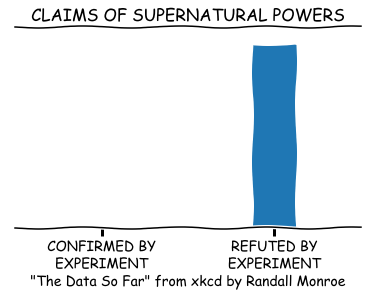

In [15]:
# source
#   http://xkcd.com/373

with plt.xkcd():
    fig = plt.figure()
    ax = fig.add_axes((0.1,0.2,0.8,0.7))
    ax.bar([0,1],[0,100],0.25)
    ax.spines['right'].set_color('none')
    ax.spines['left'].set_color('none')
    ax.xaxis.set_ticks_position('bottom')
    
    ax.set_xticks([0,1])
    ax.set_xlim([-0.5,1.5])
    ax.set_ylim([0,110])
    ax.set_xticklabels(['CONFIRMED BY\nEXPERIMENT','REFUTED BY\nEXPERIMENT'])
    plt.yticks([])
    
    plt.title("CLAIMS OF SUPERNATURAL POWERS")
    
    fig.text(
        0.5,0.001,'"The Data So Far" from xkcd by Randall Monroe',
        ha='center'
    )
    
plt.show()

# The Last One

In [16]:
import matplotlib.pyplot as plt
import numpy as np

(array([ 4., 11., 15., 12., 17., 15., 11., 11.,  2.,  2.]),
 array([-2.30725711, -1.80591307, -1.30456903, -0.803225  , -0.30188096,
         0.19946308,  0.70080712,  1.20215115,  1.70349519,  2.20483923,
         2.70618327]),
 <a list of 10 Patch objects>)

(array([[0., 0., 0., 0., 3., 1., 0., 0., 0., 0.],
        [0., 0., 2., 1., 2., 4., 0., 1., 1., 0.],
        [1., 1., 0., 1., 2., 5., 1., 3., 1., 0.],
        [0., 0., 0., 4., 2., 2., 3., 1., 0., 0.],
        [0., 1., 3., 3., 5., 2., 2., 0., 0., 1.],
        [0., 2., 1., 3., 3., 2., 4., 0., 0., 0.],
        [0., 0., 0., 3., 3., 3., 1., 1., 0., 0.],
        [0., 1., 1., 4., 1., 3., 0., 1., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 1., 0., 0., 0.]]),
 array([-2.30725711, -1.80591307, -1.30456903, -0.803225  , -0.30188096,
         0.19946308,  0.70080712,  1.20215115,  1.70349519,  2.20483923,
         2.70618327]),
 array([-2.8936741 , -2.29530631, -1.69693852, -1.09857073, -0.50020294,
         0.09816485,  0.69653264,  1.29490044,  1.89326823,  2.49163602,
         3.09000381]),
 <matplotlib.image.AxesImage at 0x117a55e10>)

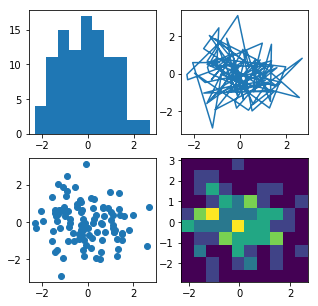

In [17]:
np.random.seed(19660506)
data = np.random.randn(2,100)

fig,axs = plt.subplots(2,2,figsize=(5,5))
axs[0,0].hist(data[0])
axs[0,1].plot(data[0],data[1])
axs[1,0].scatter(data[0],data[1])
axs[1,1].hist2d(data[0],data[1])

plt.show()